In [153]:
import mplsoccer as mpl
from mplsoccer.pitch import Pitch, add_image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

from PIL import Image

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)


In [4]:
opta = pd.read_csv('/Users/christian/Desktop/University/Birkbeck MSc Applied Statistics/Project/Data/Opta/EPL Data/Events/df_subevents_EPL_1718.csv')

In [42]:
wyscout = pd.read_csv('/Users/christian/Desktop/University/Birkbeck MSc Applied Statistics/Project/Data/Wyscout/Fully Loaded/Wyscout_Engineered_Events.csv')

---

## Filtering to just shots & looking at columns

In [282]:
wyscout_shots = wyscout.loc[(wyscout['source'] == 'England') & (wyscout['eventName'] == 'Shot')]

opta_shots = opta.loc[opta['eventType'] == 'shot']
opta_shots = opta.loc[opta['eventSubType'] == 'Goal']

shots = [(opta_shots.x1.values, opta_shots.x2.values), (wyscout_shots.start_x.values, wyscout_shots.start_y.values)]

---

## Plots

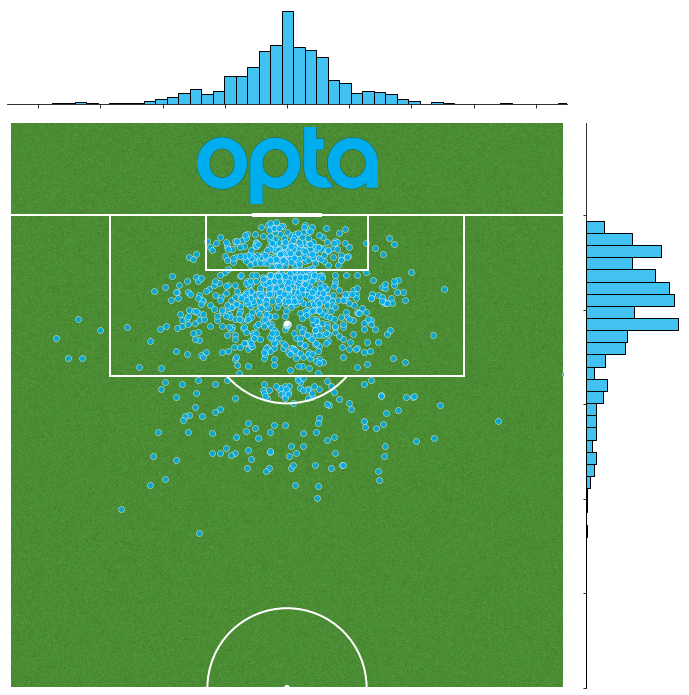

In [284]:
logo_alt = np.array(Image.open('Opta.png'))

pitch = Pitch(figsize=(16, 20), pitch_color='grass', line_color='white', tight_layout=False, view='half', orientation='vertical', line_zorder=2,
              pitch_type='opta', pad_left=-5, pad_right=-5, pad_bottom=0, pad_top=15)

g = pitch.jointplot(opta_shots.x1, opta_shots.y1, height=10, alpha=0.8, color='#02adef')

ax_image1 = add_image(logo_alt, g.fig, left=0.31, bottom=0.71, width=0.25, alpha=1, interpolation='hanning')

#g.savefig(os.path.join('/Users/christian/Desktop/University/Birkbeck MSc Applied Statistics/Project/Figures', 'shots_opta.png'), dpi=300, bbox_inches = 'tight', pad_inches = 0, transparent=True)

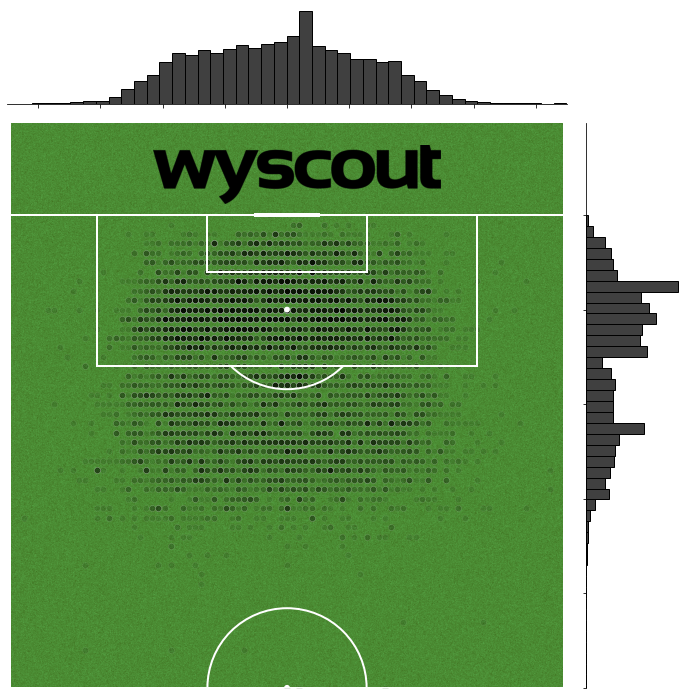

In [240]:
logo_alt = np.array(Image.open('Wyscout.png'))

pitch = Pitch(figsize=(16, 20), pitch_color='grass', line_color='white', tight_layout=True, view='half', orientation='vertical', line_zorder=2,
              pitch_type='wyscout', pad_left=-5, pad_right=-5, pad_bottom=0, pad_top=15)

g = pitch.jointplot(wyscout_shots.start_x, wyscout_shots.start_y, height=10, alpha=0.1, color='black')

ax_image1 = add_image(logo_alt, g.fig, left=0.25, bottom=0.71, width=0.4, alpha=1, interpolation='hanning')

#g.savefig(os.path.join('/Users/christian/Desktop/University/Birkbeck MSc Applied Statistics/Project/Figures', 'shots_wyscout.png'), dpi=300, bbox_inches = 'tight', pad_inches = 0, transparent=True)

/Users/christian/anaconda2/envs/py37_football/lib/python3.7/site-packages/seaborn/distributions.py:1668: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


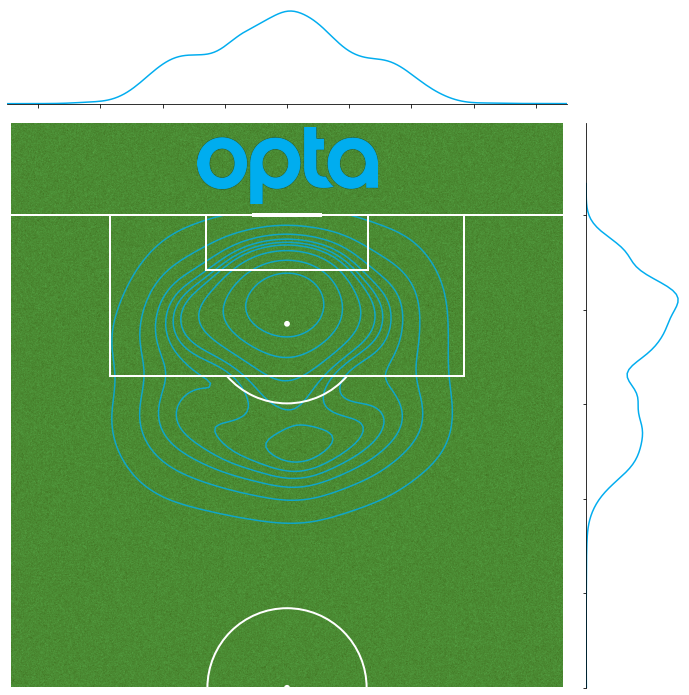

In [259]:
logo_alt = np.array(Image.open('Opta.png'))

pitch = Pitch(figsize=(16, 20), pitch_color='grass', line_color='white', tight_layout=False, view='half', orientation='vertical', line_zorder=2,
              pitch_type='opta', pad_left=-5, pad_right=-5, pad_bottom=0, pad_top=15)

g = pitch.jointplot(opta_shots.x1, opta_shots.y1, height=10, alpha=0.8, color='#02adef', kind = 'kde', bw= 0.35, kernel='gau')

ax_image1 = add_image(logo_alt, g.fig, left=0.31, bottom=0.71, width=0.25, alpha=1, interpolation='hanning')

#g.savefig(os.path.join('/Users/christian/Desktop/University/Birkbeck MSc Applied Statistics/Project/Figures', 'shots_opta.png'), dpi=300, bbox_inches = 'tight', pad_inches = 0, transparent=True)

In [147]:
opta_shots

,matchId,playerId,playerName,position,detailedPosition,playerTeamId,minsPlayed,subIn,subOut,replacedReplacingPlayerId,booking,eventType,eventSubType,eventTypeId,x1,y1,x2,y2,gameTime,timeStamp,periodId,homeTeamName,homeTeamId,awayTeamName,awayTeamId,kickOffDateTime,minute,second
51,918893,59966,Alexandre Lacazette,Forward,Striker,3,95,NaN,NaN,NaN,NaN,shot,Goal,16,88.5,52.6,100.0,54.3,1:34,2017-08-11 19:47:37.688,1,Arsenal,3,Leicester City,13,2017-08-11 19:45:00.000,1,34
68,918893,103025,Riyad Mahrez,Midfielder,RightMidfielder,13,95,NaN,NaN,NaN,NaN,shot,Miss,13,85.3,46.7,100.0,58.0,3:0,2017-08-11 19:49:04.201,1,Arsenal,3,Leicester City,13,2017-08-11 19:45:00.000,3,0
97,918893,78412,Shinji Okazaki,Forward,SencondStriker,13,71,NaN,1.0,NaN,NaN,shot,Goal,16,97.6,46.6,100.0,50.1,4:14,2017-08-11 19:50:17.554,1,Arsenal,3,Leicester City,13,2017-08-11 19:45:00.000,4,14
145,918893,81880,Alex Oxlade-Chamberlain,Midfielder,LeftMidfielder,3,95,NaN,NaN,NaN,NaN,shot,Miss,13,80.7,72.0,100.0,54.8,7:4,2017-08-11 19:53:08.344,1,Arsenal,3,Leicester City,13,2017-08-11 19:45:00.000,7,4
266,918893,81880,Alex Oxlade-Chamberlain,Midfielder,LeftMidfielder,3,95,NaN,NaN,NaN,NaN,shot,Shot Saved,15,78.6,64.3,96.9,51.8,13:35,2017-08-11 19:59:39.270,1,Arsenal,3,Leicester City,13,2017-08-11 19:45:00.000,13,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666971,919272,204480,Declan Rice,Defender,FullBack,21,92,NaN,NaN,NaN,NaN,shot,Shot Blocked,15,80.6,47.2,81.5,47.3,79:33,2018-05-13 16:38:42.250,2,West Ham United,21,Everton,11,2018-05-13 15:00:00.000,79,33
667014,919272,86934,Manuel Lanzini,Forward,AttackingMidfielder,21,86,NaN,1.0,NaN,NaN,shot,Goal,16,83.8,70.5,100.0,46.0,81:30,2018-05-13 16:40:39.626,2,West Ham United,21,Everton,11,2018-05-13 15:00:00.000,81,30
667050,919272,20467,Theo Walcott,Forward,Substitute,11,32,1.0,NaN,NaN,NaN,shot,Shot Saved,15,87.8,42.3,93.7,46.0,84:35,2018-05-13 16:43:44.494,2,West Ham United,21,Everton,11,2018-05-13 15:00:00.000,84,35
667055,919272,113688,Oumar Niasse,Forward,Striker,11,92,NaN,NaN,NaN,NaN,shot,Shot Saved,15,92.6,60.8,99.3,51.1,84:41,2018-05-13 16:43:49.919,2,West Ham United,21,Everton,11,2018-05-13 15:00:00.000,84,41


In [149]:
len(opta_shots.loc[opta_shots['eventSubType'] == 'Goal'])

979

In [151]:
len(wyscout_shots.loc[wyscout_shots['successFlag'] == 1])

2985

In [235]:
opta_shots.eventSubType.value_counts()

Miss              3371
Shot Blocked      2539
Shot Saved        2058
Goal               979
Hit Woodwork       144
Penalty Saved       20
Missed Penalty       2
Name: eventSubType, dtype: int64

In [237]:
len(opta_shots), len(wyscout_shots), len(opta_shots) / len(wyscout_shots)

(9113, 8450, 1.0784615384615384)

In [269]:
len(np.arange(0,100.1,0.1))**2

1002001

In [271]:
len(opta)

667150

In [274]:
len(wyscout.loc[wyscout['source'] == 'England'])

595119

In [275]:
len(opta) / len(wyscout.loc[wyscout['source'] == 'England'])

1.1210362969422922